In [3]:
import os 
import numpy as np 


## Divvy [with all static types]: 
- DLinear: need epoch 10 
- Autoformer: need to run 
- FEDFormer: all are same value 
## M5 [only temporal]
- DLinear
- Autoformer
- FEDFormer  

In [62]:
static_ = ["1","2","4","6","7"] 
filename_='/Users/raman/Projects/ExtFormer/results/long_term_forecast_{dataset}_96_96_{model}_{dataset}_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/{model}_{dataset}_{dataset}_96_96_static{static}_metrics.npy'
f=filename_.format(model="Fedformer", dataset="Divvy", static="1")
mse_=[]
for istatic in static_:
    mse_.append(np.load(filename_.format(model="FEDFormer", dataset="Divvy", static=istatic))[1])
mse_

[1.7853305, 1.8199545, 1.7724286, 1.7768257, 1.810515]

In [64]:
static_ = ["1","2","4","6","7"] 
filename_='/Users/raman/Projects/ExtFormer/results/long_term_forecast_{dataset}_96_96_{model}_{dataset}_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/{model}_{dataset}_{dataset}_96_96_static{static}_metrics.npy'
f=filename_.format(model="Fedformer", dataset="Divvy", static="1")
mse_=[]
for istatic in static_:
    mse_.append(np.load(filename_.format(model="DLinear", dataset="Divvy", static=istatic))[1])
mse_

[2.3652666, 2.3654668, 2.359512, 2.3811343, 2.3820229]

In [68]:
static_ = ["1","2","4","6","7"] 
filename_='/Users/raman/Projects/ExtFormer/results/long_term_forecast_{dataset}_96_96_{model}_{dataset}_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/{model}_{dataset}_{dataset}_96_96_static{static}_metrics.npy'
f=filename_.format(model="Autoformer", dataset="Divvy", static="1")
mse_=[]
for istatic in static_:
    mse_.append(np.load(filename_.format(model="Autoformer", dataset="Divvy", static=istatic))[1])
mse_

[1.7915939, 1.8089598, 1.7302086, 1.8122665, 1.8076322]

In [79]:
static_ = ["NONE","static1", "static2", "static4", "static6", "static7"]
filename_='/Users/raman/Projects/ExtFormer/results/long_term_forecast_{dataset}_96_96_{model}_{dataset}_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/{model}_{dataset}_{dataset}_96_96_{static}_metrics.npy'
f=filename_.format(model="Autoformer", dataset="Divvy", static="1")

model_mse=[]
for imodel in ["DLinear","Autoformer", "Fedformer"]:
    mse_=[]
    for istatic in static_:
        mse_.append(np.load(filename_.format(model=imodel, dataset="Divvy", static=istatic))[1])
    model_mse.append(mse_)
np.array(model_mse)


array([[2.38287  , 2.3652666, 2.3654668, 2.359512 , 2.3811343, 2.3820229],
       [1.8114887, 1.7915939, 1.8089598, 1.7302086, 1.8122665, 1.8076322],
       [1.807613 , 1.7853305, 1.8199545, 1.7724286, 1.7768257, 1.810515 ]],
      dtype=float32)

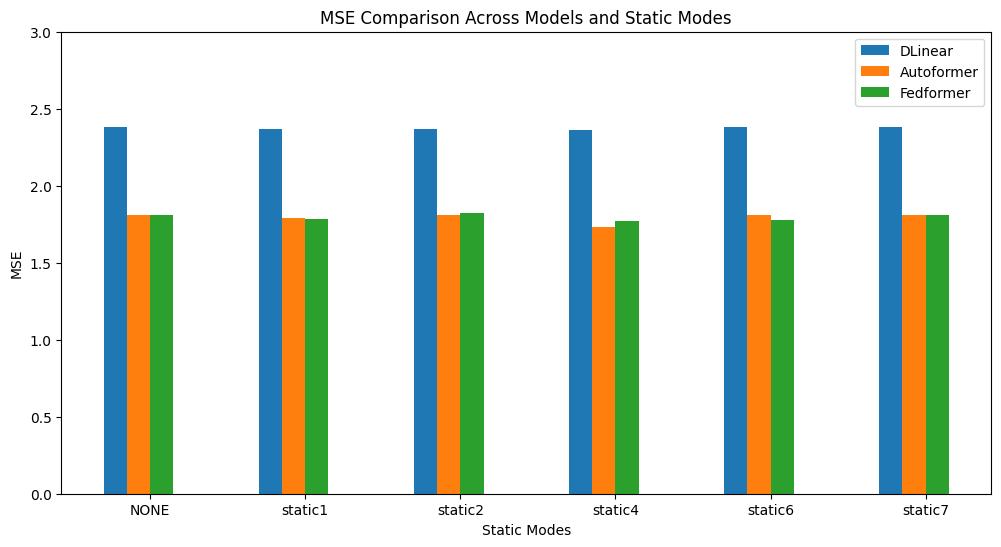

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for demonstration (assuming model_mse is filled with actual data)
static_modes = ["NONE","static1", "static2", "static4", "static6", "static7"]
models = ["DLinear", "Autoformer", "Fedformer"]

# Convert to numpy array for easier manipulation
model_mse = np.array(model_mse)

# Creating a bar chart
bar_width = 0.15  # Width of the bars
index = np.arange(len(static_modes))  # The label locations

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    plt.bar(index + i * bar_width, model_mse[i], bar_width, label=model)

# Adding labels and title
plt.xlabel('Static Modes')
plt.ylabel('MSE')
plt.title('MSE Comparison Across Models and Static Modes')
plt.xticks(index + bar_width * len(models) / 2, static_modes)  # Positioning the static mode names correctly
plt.legend()
plt.ylim(top=3)

plt.show()
